In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    # 'DayOfWeekNum',
    # 'WeekOfYear',
    # 'Month',
    # 'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    # 'SO2',
    'temp_max',
    'temp_min',
    'humidity_max',
    'humidity_min'
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag
# df_final['SO2_lag1'] = df_final['SO2'].shift(1)
# df_final['SO2_lag2'] = df_final['SO2'].shift(2)
# df_final['SO2_lag3'] = df_final['SO2'].shift(3)

# df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
# df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)


# df_final['temp_max_lag1'] = df_final['temp_max'].shift(1)
# df_final['temp_max_lag2'] = df_final['temp_max'].shift(2)
df_final['temp_max_lag3'] = df_final['temp_max'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1823 entries, 3 to 1825
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1823 non-null   object 
 1   IsHoliday          1823 non-null   int64  
 2   NUMBER_INT         1823 non-null   int64  
 3   temp_max           1823 non-null   float64
 4   temp_min           1823 non-null   float64
 5   humidity_max       1823 non-null   float64
 6   humidity_min       1823 non-null   float64
 7   temp_min_lag3      1823 non-null   float64
 8   temp_max_lag3      1823 non-null   float64
 9   humidity_max_lag3  1823 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 156.7+ KB


,Date,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,humidity_min,temp_min_lag3,temp_max_lag3,humidity_max_lag3
count,1823,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000
unique,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.024136,47.806363,28.306089,17.786725,82.257817,40.268239,17.790071,28.312507,82.261108
std,NaN,0.153514,15.627747,3.039403,2.625516,9.232062,12.655224,2.627804,3.046129,9.231910
min,NaN,0.000000,11.000000,17.800000,7.300000,42.000000,10.000000,7.300000,17.800000,42.000000
25%,NaN,0.000000,37.000000,26.300000,16.100000,77.000000,32.000000,16.100000,26.300000,77.000000
50%,NaN,0.000000,47.000000,28.500000,18.400000,84.000000,39.000000,18.400000,28.500000,84.000000
75%,NaN,0.000000,59.000000,30.400000,19.700000,90.000000,48.000000,19.700000,30.500000,90.000000


In [11]:
df_final.dtypes

Date                  object
IsHoliday              int64
NUMBER_INT             int64
temp_max             float64
temp_min             float64
humidity_max         float64
humidity_min         float64
temp_min_lag3        float64
temp_max_lag3        float64
humidity_max_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,humidity_min,temp_min_lag3,temp_max_lag3,humidity_max_lag3
3,0,20,30.6,22.2,81.0,43.0,20.6,33.9,89.0
4,0,51,30.8,20.8,79.0,36.0,21.0,32.9,87.0
5,0,23,29.5,20.5,79.0,41.0,20.2,33.5,83.0
6,0,43,28.0,19.9,78.0,44.0,22.2,30.6,81.0
7,0,49,30.4,19.7,74.0,30.0,20.8,30.8,79.0


In [14]:
df_train.tail()

,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,humidity_min,temp_min_lag3,temp_max_lag3,humidity_max_lag3
1456,0,60,24.8,18.8,92.0,68.0,18.5,31.4,91.0
1457,0,61,25.4,18.5,92.0,67.0,18.5,30.8,92.0
1458,0,30,27.5,17.7,92.0,61.0,18.6,27.9,92.0
1459,0,26,27.3,18.5,93.0,61.0,18.8,24.8,92.0
1460,0,61,25.9,19.2,92.0,65.0,18.5,25.4,92.0


In [15]:
df_val.head(10)

,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,humidity_min,temp_min_lag3,temp_max_lag3,humidity_max_lag3
1461,1,44,27.9,19.2,92.0,55.0,17.7,27.5,92.0
1462,0,45,31.1,18.9,90.0,42.0,18.5,27.3,93.0
1463,0,28,30.7,20.4,88.0,47.0,19.2,25.9,92.0
1464,0,37,25.4,19.0,91.0,59.0,19.2,27.9,92.0
1465,0,36,30.1,18.6,91.0,41.0,18.9,31.1,90.0
1466,0,30,31.8,18.8,90.0,31.0,20.4,30.7,88.0
1467,0,37,31.2,20.9,79.0,33.0,19.0,25.4,91.0
1468,0,39,29.6,19.7,87.0,49.0,18.6,30.1,91.0
1469,0,49,29.4,19.0,78.0,34.0,18.8,31.8,90.0
1470,0,51,29.2,19.7,75.0,38.0,20.9,31.2,79.0


In [16]:
df_val.tail(20)

,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,humidity_min,temp_min_lag3,temp_max_lag3,humidity_max_lag3
1801,0,32,26.6,20.3,92.0,66.0,18.6,27.4,89.0
1802,0,26,24.1,18.5,90.0,64.0,19.3,27.3,91.0
1803,0,51,27.7,18.3,84.0,55.0,19.4,28.9,92.0
1804,0,56,25.6,19.7,91.0,68.0,20.3,26.6,92.0
1805,0,49,28.0,19.4,92.0,56.0,18.5,24.1,90.0
1806,0,50,27.2,19.1,92.0,61.0,18.3,27.7,84.0
1807,0,44,31.3,18.5,92.0,39.0,19.7,25.6,91.0
1808,0,43,30.2,18.9,88.0,43.0,19.4,28.0,92.0
1809,0,28,29.0,20.2,77.0,32.0,19.1,27.2,92.0
1810,0,49,30.0,18.7,77.0,26.0,18.5,31.3,92.0


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(1):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.0203


### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,"{'max_depth': 4, 'min_samples_split': 16, 'n_e...",0.020328


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,1.0,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328
25%,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328
50%,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328
75%,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328
max,1.0,0.0,243.568639,15.606686,12.84273,25.623943,25.894154,-0.018851,0.407679,0.020328


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013
25%,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013
50%,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013
75%,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013
max,1.0,0.0,82.407198,9.077841,7.986376,22.347805,20.726892,-0.230754,-0.056013


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 1 with RMSE = 15.61
Best parameters: {'max_depth': 4, 'min_samples_split': 16, 'n_estimators': 160}


### 1y

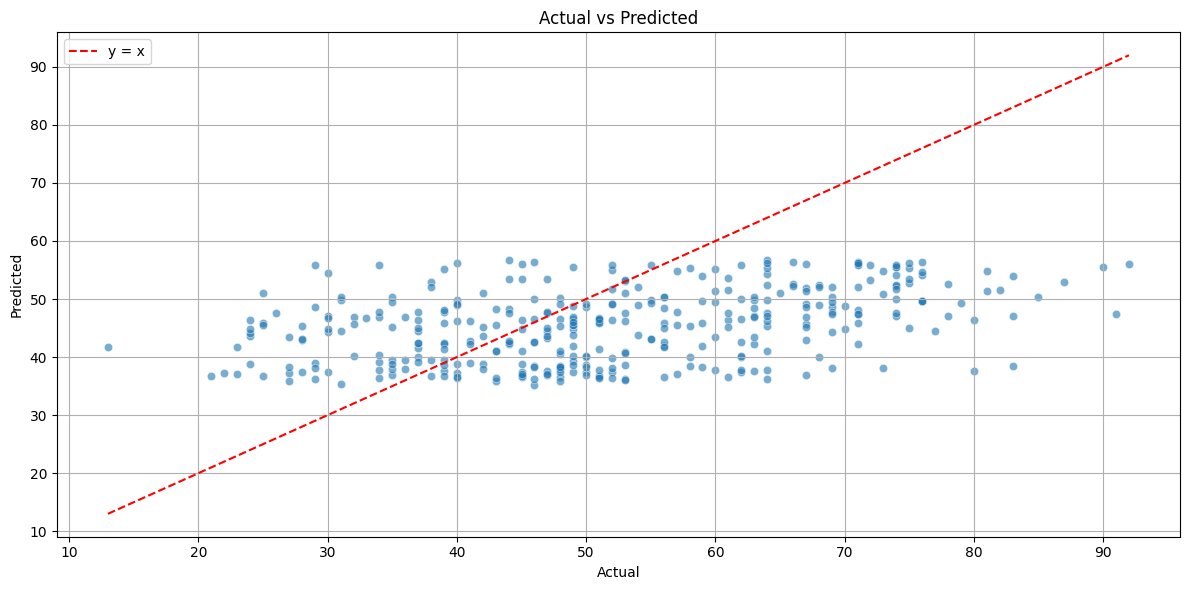

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

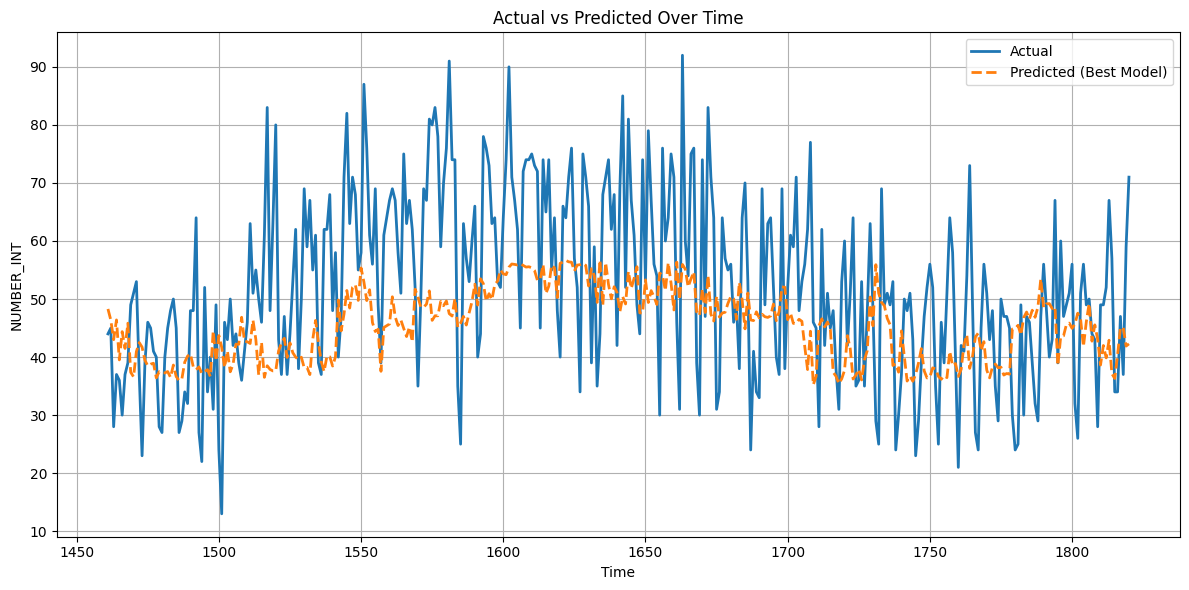

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

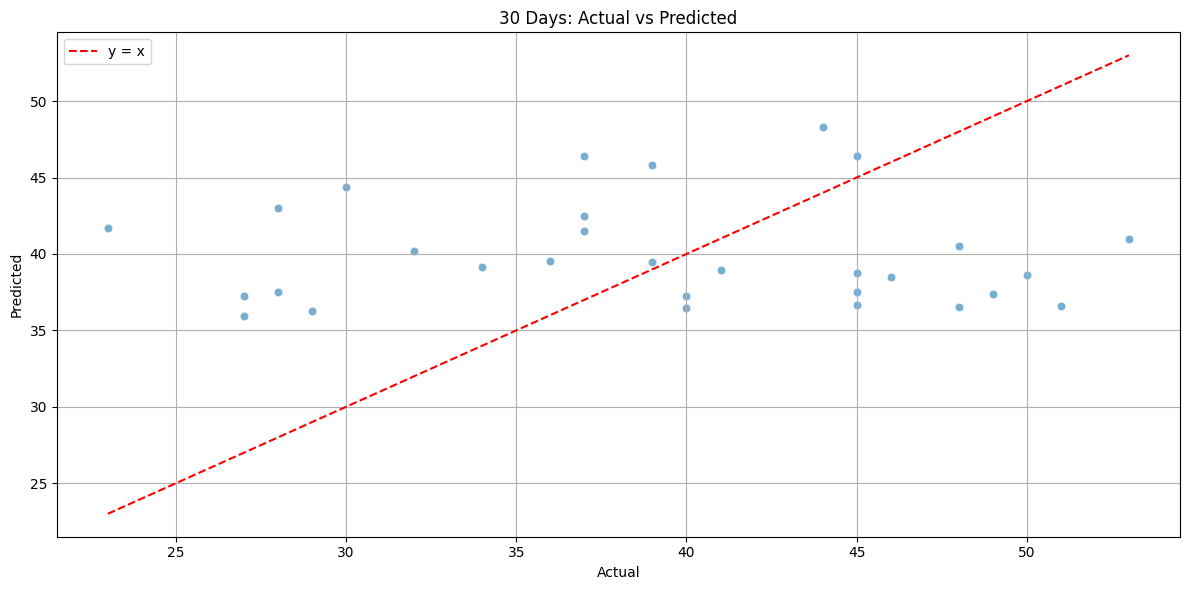

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


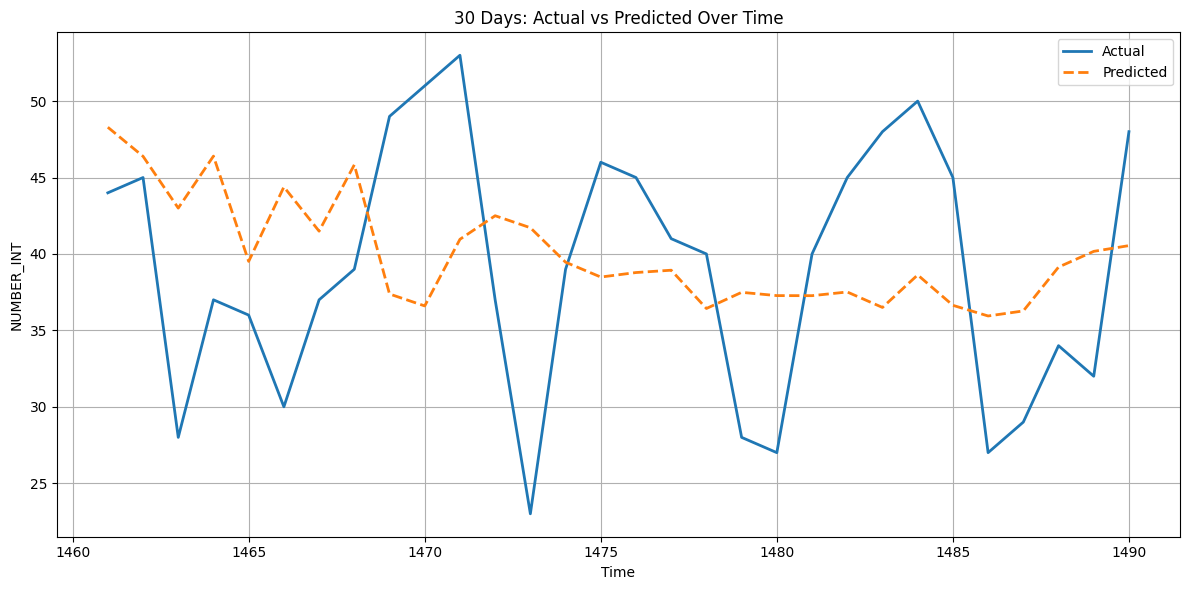

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

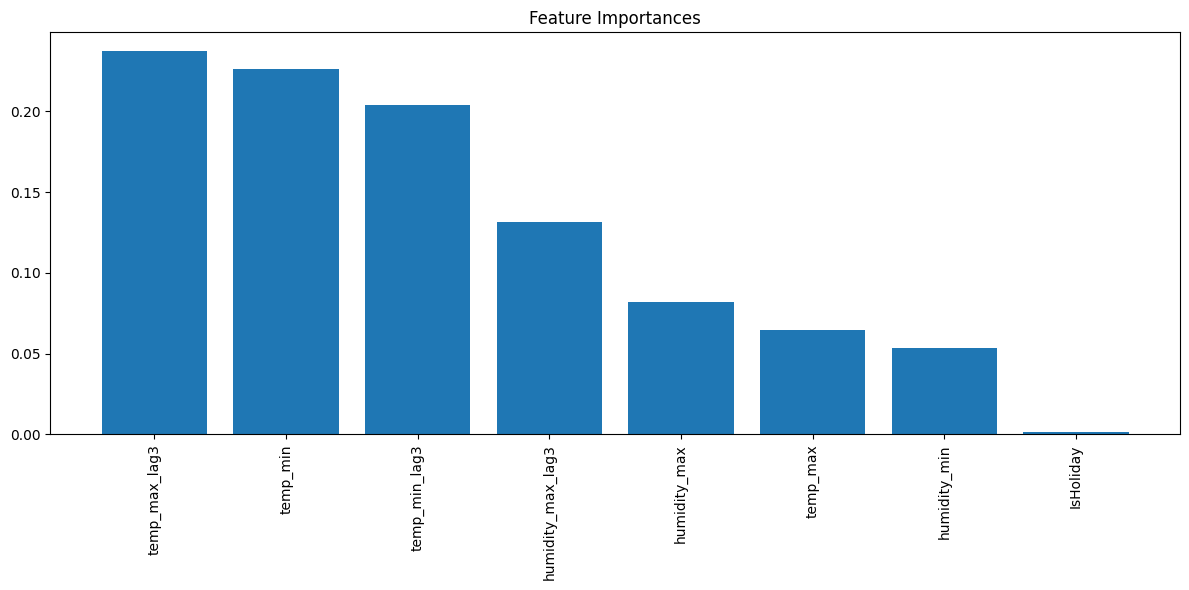

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()